In [1]:
### Task 2.1 — Drop the 3 columns with the most 'none' values (excluding 0s)


In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv('GermanCredit.csv')

# Count 'none' values per column
none_counts = (df == 'none').sum()
none_counts = none_counts[none_counts > 0].sort_values(ascending=False)

# Get top 3 columns with most 'none'
top_none_cols = none_counts.head(3).index.tolist()

# Drop them
df.drop(columns=top_none_cols, inplace=True)

# Show what was dropped
print("Dropped columns with most 'none' values:")
print(top_none_cols)


Dropped columns with most 'none' values:
['other_parties', 'other_payment_plans', 'own_telephone']


In [3]:
### Task 2.2 — Remove all apostrophes (') from string values


In [6]:
# Remove apostrophes from all string entries in the DataFrame
df = df.astype(str).apply(lambda col: col.str.replace("'", "", regex=False))

print("Removed all apostrophes from string values.")



Removed all apostrophes from string values.


In [7]:
### Task 2.3 — Convert 'credit_amount', 'duration', and 'age' columns to integers


In [9]:
# Convert relevant columns to integer type
cols_to_convert = ['credit_amount', 'duration', 'age']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')

print("Converted 'credit_amount', 'duration', and 'age' columns to integers.")


Converted 'credit_amount', 'duration', and 'age' columns to integers.


In [10]:
### Task 2.3 — Update checking_status values to categories


In [12]:
# Update checking_status values
df['checking_status'] = df['checking_status'].replace({
    'no checking': 'No Checking',
    '<0': 'Low',
    '0<=X<200': 'Medium',
    '>=200': 'High'
})

print("Updated checking_status values.")


Updated checking_status values.


In [13]:
### Task 2.4 — Update savings_status values to standardized categories


In [15]:
# Update savings_status values
df['savings_status'] = df['savings_status'].replace({
    'no known savings': 'No Savings',
    '<100': 'Low',
    '100<=X<500': 'Medium',
    '500<=X<1000': 'High',
    '>=1000': 'High'
})

print("Updated savings_status values.")


Updated savings_status values.


In [16]:
### Task 2.5 — Convert 'class' values from 'good'/'bad' to 1/0


In [18]:
# Convert class labels to binary
df['class'] = df['class'].replace({
    'good': 1,
    'bad': 0
})

print("Converted 'class' column to binary values.")


Converted 'class' column to binary values.


In [19]:
### Task 2.6 — Standardize 'employment' values based on experience range


In [20]:
# Map employment values to new labels
df['employment'] = df['employment'].replace({
    'unemployed': 'Unemployed',
    '<1': 'Amateur',
    '1<=X<4': 'Professional',
    '4<=X<7': 'Experienced',
    '>=7': 'Expert'
})

print("Updated 'employment' values.")


Updated 'employment' values.


In [21]:
### Task 2.7.1 — Crosstab of foreign_worker vs class (credit outcome)


In [22]:
# Crosstab: foreign_worker vs class
foreign_class_ct = pd.crosstab(df['foreign_worker'], df['class'])

print("Crosstab: foreign_worker vs class")
print(foreign_class_ct)


Crosstab: foreign_worker vs class
class             0    1
foreign_worker          
no                4   33
yes             296  667


In [23]:
### Task 2.7.2 — Crosstab of employment vs savings_status


In [24]:
# Crosstab: employment vs savings_status
emp_savings_ct = pd.crosstab(df['employment'], df['savings_status'])

print("Crosstab: employment vs savings_status")
print(emp_savings_ct)


Crosstab: employment vs savings_status
savings_status  High  Low  Medium  No Savings
employment                                   
Amateur           12  120      17          23
Experienced       18  100      24          32
Expert            34  133      22          64
Professional      44  210      33          52
Unemployed         3   40       7          12


In [25]:
### Task 2.7.3 — Average credit_amount for single males with 4–7 years employment (Experienced)


In [28]:
# Filter for single males with 4–7 years of employment
print(df['personal_status'].unique())
print(df['employment'].unique())

filtered = df[(df['personal_status'] == 'male single') & (df['employment'] == 'Experienced')]


# Calculate average credit amount
avg_credit = filtered['credit_amount'].mean()

print(f"Average credit_amount: {avg_credit}")


['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']
['Expert' 'Professional' 'Experienced' 'Unemployed' 'Amateur']
Average credit_amount: 4142.592592592592


In [29]:
### Task 2.7.4 — Find average credit duration for each job type


In [30]:
# Group by job and calculate average credit duration
avg_duration_per_job = df.groupby('job')['duration'].mean()

print("Average credit duration per job type:")
print(avg_duration_per_job)


Average credit duration per job type:
job
high qualif/self emp/mgmt    25.168919
skilled                      21.411111
unemp/unskilled non res      17.363636
unskilled resident              16.535
Name: duration, dtype: Float64


In [31]:
### Task 2.7.5 — Most common checking_status and savings_status for purpose = "education"


In [32]:
# Filter for rows where purpose is 'education'
education_df = df[df['purpose'] == 'education']

# Find most common checking_status and savings_status
most_common_checking = education_df['checking_status'].mode()[0]
most_common_savings = education_df['savings_status'].mode()[0]

print(f"Most common checking status: {most_common_checking}")
print(f"Most common savings status: {most_common_savings}")


Most common checking status: No Checking
Most common savings status: Low


In [33]:
### Task 2.8.1 — Bar Charts: savings_status and checking_status to personal_status


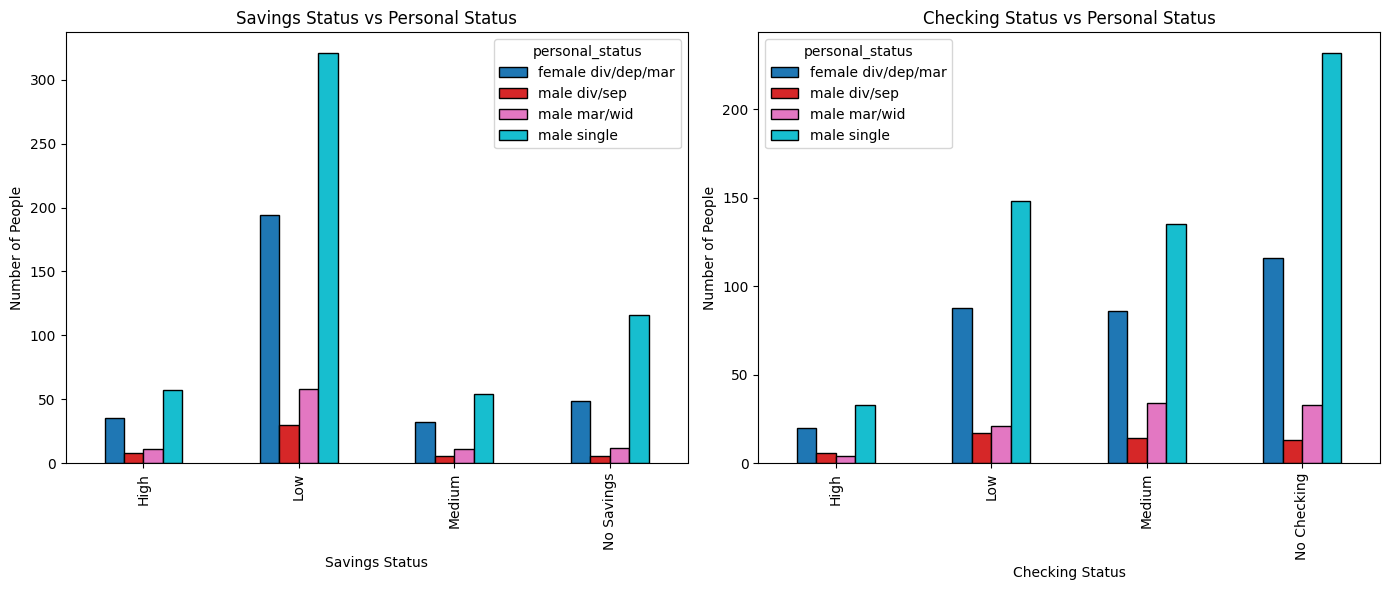

In [34]:
import matplotlib.pyplot as plt

# Create figure and two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot 1: savings_status → personal_status
savings_ct = pd.crosstab(df['savings_status'], df['personal_status'])
savings_ct.plot(kind='bar', stacked=False, ax=axs[0], colormap='tab10', edgecolor='black')
axs[0].set_title('Savings Status vs Personal Status')
axs[0].set_xlabel('Savings Status')
axs[0].set_ylabel('Number of People')

# Bar plot 2: checking_status → personal_status
checking_ct = pd.crosstab(df['checking_status'], df['personal_status'])
checking_ct.plot(kind='bar', stacked=False, ax=axs[1], colormap='tab10', edgecolor='black')
axs[1].set_title('Checking Status vs Personal Status')
axs[1].set_xlabel('Checking Status')
axs[1].set_ylabel('Number of People')

# Layout and show
plt.tight_layout()
plt.show()


In [35]:
### Task 2.8.2 — Bar Chart: Property Magnitude vs Avg Age (credit_amount > 4000)


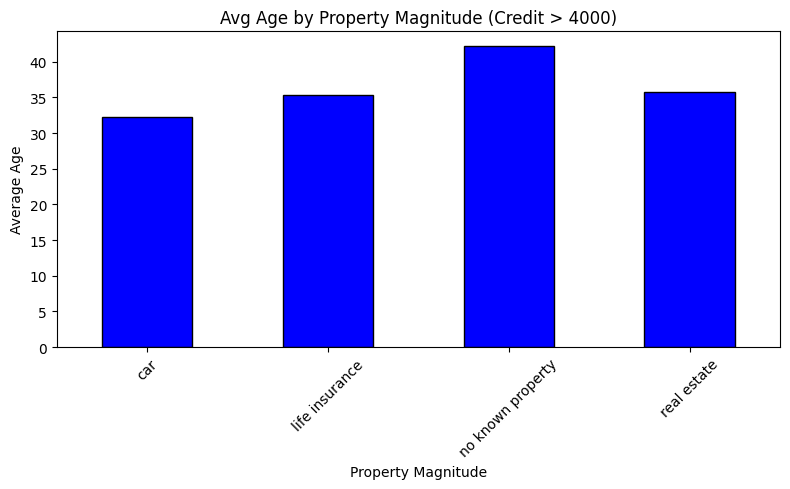

In [38]:
# Filter for credit_amount > 4000
high_credit_df = df[df['credit_amount'] > 4000]

# Group by property_magnitude and get average age
avg_age_by_property = high_credit_df.groupby('property_magnitude')['age'].mean()

# Plot
avg_age_by_property.plot(kind='bar', color='blue', edgecolor='black', figsize=(8, 5))
plt.title('Avg Age by Property Magnitude (Credit > 4000)')
plt.xlabel('Property Magnitude')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [39]:
### Task 2.8.3 — Pie Charts for High Savings and Age > 40


In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("GermanCredit.csv")

# --- Minimal Preprocessing for the Pie Chart Section ---
# Convert age column to numeric if it isn't already.
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Recode savings_status so that '500<=X<1000' and '>=1000' become 'High'.
df['savings_status'] = df['savings_status'].replace({
    'no known savings': 'No Savings',
    '<100': 'Low',
    '100<=X<500': 'Medium',
    '500<=X<1000': 'High',
    '>=1000': 'High'
})

# (Assume other preprocessing has been done previously)

# Debug: Print the unique values to confirm the recoding
print("Unique savings_status values:", df['savings_status'].unique())
print("Age summary:")
print(df['age'].describe())

# --- Filter Data for Visualization ---
# Filter for rows with "High" savings_status and age > 40
filtered_df = df[(df['savings_status'] == 'High') & (df['age'] > 40)]
print("Filtered DataFrame shape (High and age > 40):", filtered_df.shape)

# For demonstration purposes, if the filtered_df is empty,
# we fall back to using the entire dataset so that a pie chart is produced.
if filtered_df.empty:
    print("No rows match the filter (savings_status == 'High' and age > 40'). Using full dataset for demonstration.")
    filtered_df = df.copy()

# --- Visualization: Create Three Pie Charts ---
# Set up subplots: 1 row, 3 columns
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Pie Chart 1: Personal Status
personal_counts = filtered_df['personal_status'].value_counts()
axs[0].pie(personal_counts, labels=personal_counts.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title("Personal Status")
axs[0].set_ylabel("")

# Pie Chart 2: Credit History
credit_counts = filtered_df['credit_history'].value_counts()
axs[1].pie(credit_counts, labels=credit_counts.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title("Credit History")
axs[1].set_ylabel("")

# Pie Chart 3: Job
job_counts = filtered_df['job'].value_counts()
axs[2].pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', startangle=90)
axs[2].set_title("Job")
axs[2].set_ylabel("")

plt.tight_layout()
plt.show()
